In [1]:
# lets Install necessary packages
!pip install pandas
!pip install numpy
!pip install seaborn

# lets Install pmdarima
!pip install pmdarima

!pip install tensorflow

# Notebook presentation slides
!pip install RISE

# lets Install textblob for spelling corrections
!pip install textblob

In [2]:
# lets Ignor warning error
import warnings
warnings.filterwarnings('ignore')

# lets import standard libraries 
import numpy as np # linear algebra
import pandas as pd # dataset processing
from pandas import Series, DataFrame

# lets import visualization packages
import matplotlib as mpl
import matplotlib.pyplot as plt

import seaborn as sns
from matplotlib.axes._axes import _log as matplotlib_axes_logger
matplotlib_axes_logger.setLevel('ERROR')

# lets import TensorFlow package
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras import callbacks
from tensorflow import keras

# lets import parser
from dateutil.parser import parse

#lets confirm Spelling corrections
import textblob

# lets import reduce
from functools import reduce

# lets import bag count vectorizer function
from sklearn.feature_extraction.text import CountVectorizer

# lets import appropriate tokenize function
import nltk
from nltk import word_tokenize
nltk.download('punkt')

# lets import nltk 'stopwords' functions
nltk.download('stopwords')
from nltk.corpus import stopwords

# lets import EarlyStopping
import tensorflow
from keras.callbacks import ModelCheckpoint, EarlyStopping

2022-11-29 13:03:44.138808: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/ibrahimsuleiman/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/ibrahimsuleiman/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
# lets load data set into Pandas data frame
amazon_path = 'amazon_cells_labelled.txt'
amazon_df_original = pd.read_csv(amazon_path, names = ['review', 'sentiments'], sep = '\t')

imdb_path = 'imdb_labelled.txt'
imdb_df_original = pd.read_csv(imdb_path, names = ['review', 'sentiments'], sep = '\t')

yelp_path = 'yelp_labelled.txt'
yelp_df_original = pd.read_csv(yelp_path, names = ['review', 'sentiments'], sep = '\t')

In [4]:
# lets display data frame
amazon_df = amazon_df_original.copy()
imdb_df = imdb_df_original.copy()
yelp_df = yelp_df_original.copy()

In [5]:
# lets review data
print('Amazon: ', amazon_df.head(15))
print('IMDB: ', imdb_df.head(15))
print('Yelp: ', yelp_df.head(15))

Amazon:                                                 review  sentiments
0   So there is no way for me to plug it in here i...           0
1                         Good case, Excellent value.           1
2                              Great for the jawbone.           1
3   Tied to charger for conversations lasting more...           0
4                                   The mic is great.           1
5   I have to jiggle the plug to get it to line up...           0
6   If you have several dozen or several hundred c...           0
7         If you are Razr owner...you must have this!           1
8                 Needless to say, I wasted my money.           0
9                    What a waste of money and time!.           0
10                    And the sound quality is great.           1
11  He was very impressed when going from the orig...           1
12  If the two were seperated by a mere 5+ ft I st...           0
13                           Very good quality though           1
1

In [6]:
# lets evaluate the data structure to understand input data better
# lets check dataset size
print('Amazon: ', amazon_df.shape)
print('IMDB: ', imdb_df.shape)
print('Yelp: ', yelp_df.shape)

Amazon:  (1000, 2)
IMDB:  (748, 2)
Yelp:  (1000, 2)


In [7]:
# lets review individual DataFrames info - Amazon
amazon_df.info

<bound method DataFrame.info of                                                 review  sentiments
0    So there is no way for me to plug it in here i...           0
1                          Good case, Excellent value.           1
2                               Great for the jawbone.           1
3    Tied to charger for conversations lasting more...           0
4                                    The mic is great.           1
..                                                 ...         ...
995  The screen does get smudged easily because it ...           0
996  What a piece of junk.. I lose more calls on th...           0
997                       Item Does Not Match Picture.           0
998  The only thing that disappoint me is the infra...           0
999  You can not answer calls with the unit, never ...           0

[1000 rows x 2 columns]>

In [8]:
# lets review individual DataFrames info - IMDB
print('IMDB: ', imdb_df.shape)
imdb_df.info

IMDB:  (748, 2)


<bound method DataFrame.info of                                                 review  sentiments
0    A very, very, very slow-moving, aimless movie ...           0
1    Not sure who was more lost - the flat characte...           0
2    Attempting artiness with black & white and cle...           0
3         Very little music or anything to speak of.             0
4    The best scene in the movie was when Gerardo i...           1
..                                                 ...         ...
743  I just got bored watching Jessice Lange take h...           0
744  Unfortunately, any virtue in this film's produ...           0
745                   In a word, it is embarrassing.             0
746                               Exceptionally bad!             0
747  All in all its an insult to one's intelligence...           0

[748 rows x 2 columns]>

In [9]:
# lets review individual DataFrames info - Yelp
print('Yelp: ', yelp_df.shape)
yelp_df.info

Yelp:  (1000, 2)


<bound method DataFrame.info of                                                 review  sentiments
0                             Wow... Loved this place.           1
1                                   Crust is not good.           0
2            Not tasty and the texture was just nasty.           0
3    Stopped by during the late May bank holiday of...           1
4    The selection on the menu was great and so wer...           1
..                                                 ...         ...
995  I think food should have flavor and texture an...           0
996                           Appetite instantly gone.           0
997  Overall I was not impressed and would not go b...           0
998  The whole experience was underwhelming, and I ...           0
999  Then, as if I hadn't wasted enough of my life ...           0

[1000 rows x 2 columns]>

In [10]:
# lets combine the three review labeled files
# lets check the list of the combine data frame
new_dataframes = [amazon_df, imdb_df, yelp_df]

# lets import reduce
from functools import reduce

# lets combine the three DataFrames into one
combine_df = reduce(lambda left,right: pd.merge(left,right, on = ['review', 'sentiments'], how = 'outer'), new_dataframes)

# lets check the combined data frames
combine_df


,review,sentiments
0,So there is no way for me to plug it in here i...,0
1,"Good case, Excellent value.",1
2,Great for the jawbone.,1
3,Tied to charger for conversations lasting more...,0
4,The mic is great.,1
...,...,...
2743,I think food should have flavor and texture an...,0
2744,Appetite instantly gone.,0
2745,Overall I was not impressed and would not go b...,0
2746,"The whole experience was underwhelming, and I ...",0


In [11]:
# lets Re-validate column, null values, and find missing values.
# lets check null values
df = combine_df
data_nulls = df.isnull().sum()
print(data_nulls)

# lets remove our nulls
#df = df.dropna(subset=['review'])

review        0
sentiments    0
dtype: int64


In [12]:
# lets check missing data and its size
def missing_cols(combine_df):
    '''prints out columns with its amount of missing values'''
    total = 0
    for col in combine_df.columns:
        missing_vals = combine_df[col].isnull().sum()
        total += missing_vals
        if missing_vals != 0:
            print(f"{col} => {combine_df[col].isnull().sum()}")
    
    if total == 0:
        print("There are no missing values left")
            
missing_cols(combine_df)

There are no missing values left


In [13]:
# lets check combined data frame info
combine_df.info

<bound method DataFrame.info of                                                  review  sentiments
0     So there is no way for me to plug it in here i...           0
1                           Good case, Excellent value.           1
2                                Great for the jawbone.           1
3     Tied to charger for conversations lasting more...           0
4                                     The mic is great.           1
...                                                 ...         ...
2743  I think food should have flavor and texture an...           0
2744                           Appetite instantly gone.           0
2745  Overall I was not impressed and would not go b...           0
2746  The whole experience was underwhelming, and I ...           0
2747  Then, as if I hadn't wasted enough of my life ...           0

[2748 rows x 2 columns]>

In [14]:
# lets check combined data frame columns
combine_df.columns

Index(['review', 'sentiments'], dtype='object')

In [15]:
# lets check combined data frame type
type(combine_df)

pandas.core.frame.DataFrame

In [16]:
# lets check data types of features
combine_df.dtypes

review        object
sentiments     int64
dtype: object

In [17]:
# lets check binary rating (0 = negative, 1 = positive)
combine_df.sentiments.unique()

array([0, 1])

In [18]:
# lets check positive and negative reviews from combined DataFrame
print('Combine data - Count:\n ', combine_df.sentiments.value_counts())
print('\n Combine data - Percentage:\n', combine_df.sentiments.value_counts() / len(combine_df))

Combine data - Count:
  1    1386
0    1362
Name: sentiments, dtype: int64

 Combine data - Percentage:
 1    0.504367
0    0.495633
Name: sentiments, dtype: float64


<AxesSubplot:>

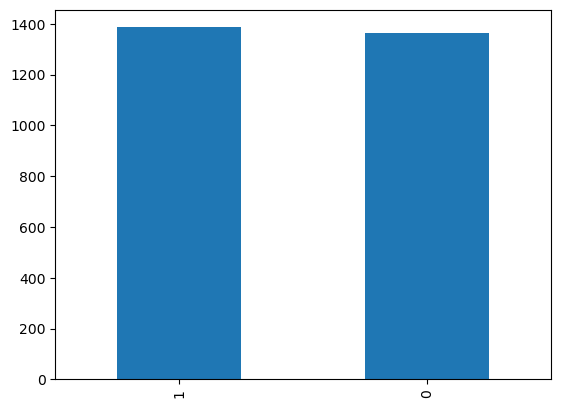

In [19]:
# lets analyze distribution of the ratings - sentiments
combine_df['sentiments'].value_counts().plot(kind='bar')

In [20]:
# lets describe dataset statistics
combine_df.describe()

,sentiments
count,2748.000000
mean,0.504367
std,0.500072
min,0.000000
25%,0.000000
50%,1.000000
75%,1.000000
max,1.000000


In [21]:
# lets check for emoji "":D""
for i in combine_df.review:
    substring = ":)"
    if substring in i:
        print("The line contains :D emoji")

The line contains :D emoji
The line contains :D emoji
The line contains :D emoji
The line contains :D emoji


In [22]:
# lets check for unusual characters
def isEnglish(review):
    return review.isascii()
for i in combine_df.review:
    if isEnglish(i) != True:
        print(isEnglish(i))

False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False


In [23]:
# lets check vocabulary size, proposed word embedding length
# lets find lengths of reviews
reviews_length = combine_df.review.str.len()
reviews_length

0        82
1        27
2        22
3        79
4        17
       ... 
2743     66
2744     24
2745     50
2746     91
2747    134
Name: review, Length: 2748, dtype: int64

In [24]:
#lets find estimation of vocabulary size; how many unique words are there within the DataFrame
unique_word = set(combine_df['review'].str.replace('[^a-zA-Z]', '').str.lower().str.split(' ').sum())

# lets check the length of unique words
print('There are ', str(len(unique_word)), ' unique words in the review column of combine dataframe.')

There are  2717  unique words in the review column of combine dataframe.


In [25]:
# lets check the length of the shortest review
print('The shortest review is ', str(min(reviews_length)),' words')

The shortest review is  7  words


In [26]:
# lets check the length of the longest review
print('The longest review is ', str(max(reviews_length)),' words')

The longest review is  7944  words


In [27]:
# lets check for the total length of all reviews
sum(reviews_length)

196560

In [28]:
# lets Tokenize words
# lets Import appropriate tokenize function
import nltk
from nltk import word_tokenize

In [29]:
# lets tokenize the text of the review
word_tokens = [word_tokenize(review) for review in combine_df.review]

# lets print first ten  reviews
print('Word Tokenization firs 10 reviews results:')
print(word_tokens[:10])

Word Tokenization firs 10 reviews results:
[['So', 'there', 'is', 'no', 'way', 'for', 'me', 'to', 'plug', 'it', 'in', 'here', 'in', 'the', 'US', 'unless', 'I', 'go', 'by', 'a', 'converter', '.'], ['Good', 'case', ',', 'Excellent', 'value', '.'], ['Great', 'for', 'the', 'jawbone', '.'], ['Tied', 'to', 'charger', 'for', 'conversations', 'lasting', 'more', 'than', '45', 'minutes.MAJOR', 'PROBLEMS', '!', '!'], ['The', 'mic', 'is', 'great', '.'], ['I', 'have', 'to', 'jiggle', 'the', 'plug', 'to', 'get', 'it', 'to', 'line', 'up', 'right', 'to', 'get', 'decent', 'volume', '.'], ['If', 'you', 'have', 'several', 'dozen', 'or', 'several', 'hundred', 'contacts', ',', 'then', 'imagine', 'the', 'fun', 'of', 'sending', 'each', 'of', 'them', 'one', 'by', 'one', '.'], ['If', 'you', 'are', 'Razr', 'owner', '...', 'you', 'must', 'have', 'this', '!'], ['Needless', 'to', 'say', ',', 'I', 'wasted', 'my', 'money', '.'], ['What', 'a', 'waste', 'of', 'money', 'and', 'time', '!', '.']]


In [30]:
# lets check word_tokens type
type(word_tokens)

list

In [31]:
# lets check sample review #6
combine_df.review[6]

'If you have several dozen or several hundred contacts, then imagine the fun of sending each of them one by one.'

In [32]:
# lets count words in the reviews column
combine_df['word_count'] = combine_df['review'].str.split().str.len()
combine_df.head()

,review,sentiments,word_count
0,So there is no way for me to plug it in here i...,0,21
1,"Good case, Excellent value.",1,4
2,Great for the jawbone.,1,4
3,Tied to charger for conversations lasting more...,0,11
4,The mic is great.,1,4


In [33]:
#lets measure the average word count in the reviews
print('The average of ' + str(combine_df['word_count'].mean()) + ' word per customer review.' )

The average of 13.006550218340612 word per customer review.


In [34]:
# lets count how many tokens in each tokenized review
tokens_lengh = []

# lets iterate over the word_tokens list
for i in range(len(word_tokens)):
    tokens_lengh.append(len(word_tokens[i]))
    
# New 'tokens_count' feature for the length of each review
combine_df['tokens_count'] = tokens_lengh

# lets review
combine_df.head()


,review,sentiments,word_count,tokens_count
0,So there is no way for me to plug it in here i...,0,21,22
1,"Good case, Excellent value.",1,4,6
2,Great for the jawbone.,1,4,5
3,Tied to charger for conversations lasting more...,0,11,13
4,The mic is great.,1,4,5


In [35]:
# lets replace all capital with lowercase letters
combine_df['clean_review'] = combine_df.review.apply(lambda x: " ".join(x.lower() for x in x.split()))

#combine_df['clean_review'] = combine_df['review'].str.lower()

In [36]:
# lets remove all numbers from clean_review
combine_df['clean_review'] = combine_df['clean_review'].str.replace('\d+','')

combine_df.head()


,review,sentiments,word_count,tokens_count,clean_review
0,So there is no way for me to plug it in here i...,0,21,22,so there is no way for me to plug it in here i...
1,"Good case, Excellent value.",1,4,6,"good case, excellent value."
2,Great for the jawbone.,1,4,5,great for the jawbone.
3,Tied to charger for conversations lasting more...,0,11,13,tied to charger for conversations lasting more...
4,The mic is great.,1,4,5,the mic is great.


In [37]:
# lets select special characters
unique_character = ["*","+",",","-",".","/",":",";","<",
 "=",">","?","@","!",'"',"#","%","&","'","(",")","[","\\","]","^","_",
 "`","{","|","}","~","–"]

In [38]:
# lets replace all special characters
for char in unique_character:
 combine_df['clean_review'] = combine_df['clean_review'].str.replace(char, ' ',regex=True)

#lets remove Punctuation
#combine_df['clean_review'] = combine_df['clean_review'].str.replace('[^\w\s]', '')

combine_df.head()

,review,sentiments,word_count,tokens_count,clean_review
0,So there is no way for me to plug it in here i...,0,21,22,so there is no way for me to plug it in here i...
1,"Good case, Excellent value.",1,4,6,good case excellent value
2,Great for the jawbone.,1,4,5,great for the jawbone
3,Tied to charger for conversations lasting more...,0,11,13,tied to charger for conversations lasting more...
4,The mic is great.,1,4,5,the mic is great


In [39]:
# lets Import nltk functions, load stopwords
#nltk.download('stopwords')
#from nltk.corpus import stopwords

In [40]:
# lets remove stop words
stop_word = stopwords.words('english')
combine_df['clean_review'] = combine_df['clean_review'].apply(lambda x: " ".join(x for x in x.split() if x not in stop_word))
combine_df


,review,sentiments,word_count,tokens_count,clean_review
0,So there is no way for me to plug it in here i...,0,21,22,way plug us unless go converter
1,"Good case, Excellent value.",1,4,6,good case excellent value
2,Great for the jawbone.,1,4,5,great jawbone
3,Tied to charger for conversations lasting more...,0,11,13,tied charger conversations lasting minutes maj...
4,The mic is great.,1,4,5,mic great
...,...,...,...,...,...
2743,I think food should have flavor and texture an...,0,12,13,think food flavor texture lacking
2744,Appetite instantly gone.,0,3,4,appetite instantly gone
2745,Overall I was not impressed and would not go b...,0,10,11,overall impressed would go back
2746,"The whole experience was underwhelming, and I ...",0,16,19,whole experience underwhelming think go ninja ...


In [41]:
# lets remove specific words that occur in both positive and negative reviews
negative_review = combine_df[combine_df.sentiments == 0]['clean_review']
positive_review = combine_df[combine_df.sentiments == 1]['clean_review']

# lets apply word remover
def word_remover(review):
    return ' '.join([i for i in review.split() if i not in ['film', 'get', 'good', 'like', 'movi', 'phone', 'work']])

negative_review = negative_review.apply(word_remover)
positive_review = positive_review.apply(word_remover)

combine_df

,review,sentiments,word_count,tokens_count,clean_review
0,So there is no way for me to plug it in here i...,0,21,22,way plug us unless go converter
1,"Good case, Excellent value.",1,4,6,good case excellent value
2,Great for the jawbone.,1,4,5,great jawbone
3,Tied to charger for conversations lasting more...,0,11,13,tied charger conversations lasting minutes maj...
4,The mic is great.,1,4,5,mic great
...,...,...,...,...,...
2743,I think food should have flavor and texture an...,0,12,13,think food flavor texture lacking
2744,Appetite instantly gone.,0,3,4,appetite instantly gone
2745,Overall I was not impressed and would not go b...,0,10,11,overall impressed would go back
2746,"The whole experience was underwhelming, and I ...",0,16,19,whole experience underwhelming think go ninja ...


In [42]:
# lets check sample review #6
combine_df.clean_review[6]

'several dozen several hundred contacts imagine fun sending one one'

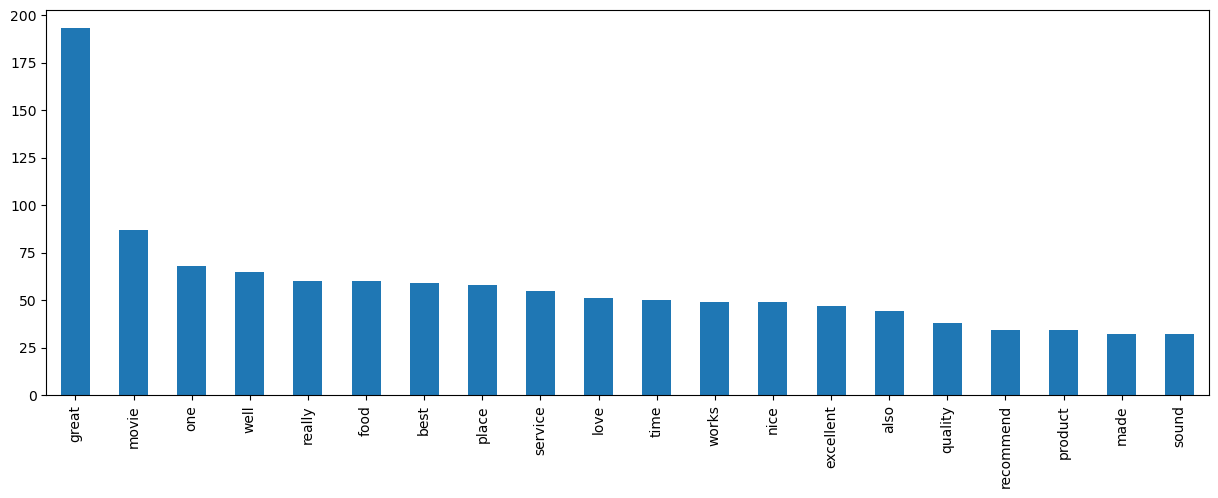

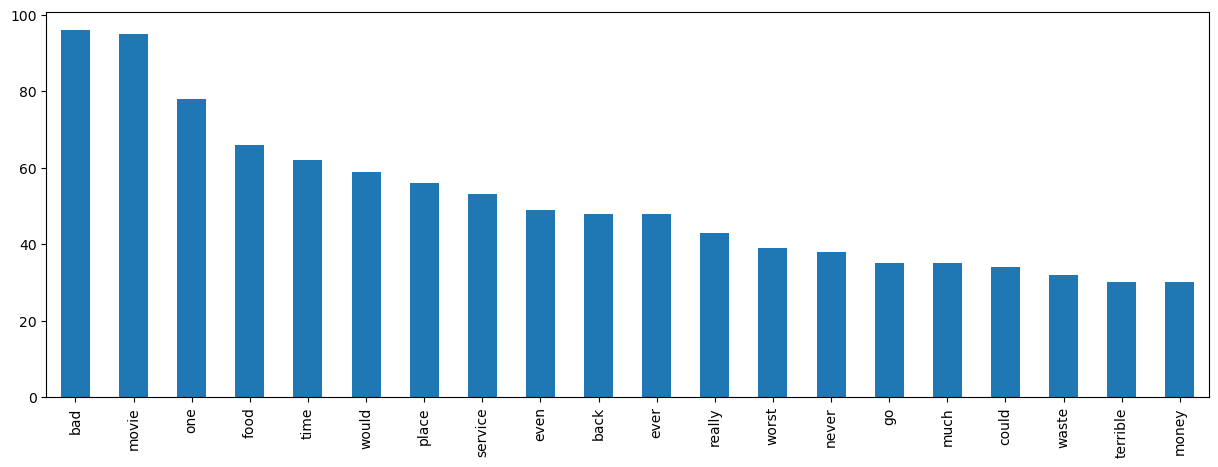

In [43]:
# lets create visualization
split_df = [positive_review, negative_review]

for item in range(2):
    plt.figure(figsize = (15, 5))
    pd.Series(' '.join([i for i in split_df[item]]).split()).value_counts().head(20).plot(kind = 'bar')
    plt.show();

In [44]:
# lets Split the data set
from sklearn.model_selection import train_test_split

# lets Set predictor and outcome variables
X = combine_df['clean_review']
y = combine_df['sentiments']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)

# lets Print size of data splits
print('Shape of training set:', X_train.shape[0])
print('Shape of test set:', X_test.shape[0])

Shape of training set: 2198
Shape of test set: 550


In [45]:
#X,y = combine_df['review'].values,combine_df['sentiments'].values
#x_train,x_test,y_train,y_test = train_test_split(X,y,stratify=y, test_size = 0.20)

In [46]:
# lets Split the data set in 80/20 training and testing

split = round(len(combine_df)*0.8)
train_reviews = combine_df['clean_review'][:split]
train_label = combine_df['sentiments'][:split]
test_reviews = combine_df['clean_review'][split:]
test_label = combine_df['sentiments'][split:]

In [47]:
# After tokenization, lets set up the split 
train_sentences = []
train_labels = []
test_sentences = []
test_labels = []

for row in train_reviews:
    train_sentences.append(str(row))
for row in train_label:
    train_labels.append(row)
for row in test_reviews:
    test_sentences.append(str(row))
for row in test_label:
    test_labels.append(row)

In [48]:
# lets Set parameters for vocab
# lets set Train at 2200 words
vocab_size = 2200

# 16 dimensions
embedding_dim = 16

# lets set the Max length of each review limited to 100 words per review
max_length = 100

# lets apply Truncating after 100 words 
trunc_type = 'post'
oov_tok = ''

# Padding applied at the end of the review
padding_type = 'post'


In [49]:
# Tokenizer
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)

# Fit the tokenizer - train set
tokenizer.fit_on_texts(train_sentences)

# Word index
word_index = tokenizer.word_index

print('The vocab has ',str(len(word_index)),' words.')

The vocab has  4488  words.


In [50]:
# lets set sequences and padding
sequences = tokenizer.texts_to_sequences(train_sentences)

# Setting padding
padded = pad_sequences(sequences, maxlen=max_length, truncating=trunc_type)
test_sentences = tokenizer.texts_to_sequences(test_sentences)
test_padded = pad_sequences(test_sentences, maxlen=max_length)

In [51]:
# lets Pad the sentences
print("\nTraining sequences:\n", train_sentences)


Training sequences:
 ['way plug us unless go converter', 'good case excellent value', 'great jawbone', 'tied charger conversations lasting minutes major problems', 'mic great', 'jiggle plug get line right get decent volume', 'several dozen several hundred contacts imagine fun sending one one', 'razr owner must', 'needless say wasted money', 'waste money time', 'sound quality great', 'impressed going original battery extended battery', 'two seperated mere ft started notice excessive static garbled sound headset', 'good quality though', 'design odd ear clip comfortable', 'highly recommend one blue tooth phone', 'advise everyone fooled', 'far good', 'works great', 'works great', 'clicks place way makes wonder long mechanism would last', 'went motorola website followed directions could get pair', 'bought use kindle fire absolutely loved', 'commercials misleading', 'yet run new battery two bars three days without charging', 'bought mother problem battery', 'great pocket pc phone combinatio

In [52]:
combine_df.groupby('sentiments').count()

,review,word_count,tokens_count,clean_review
sentiments,,,,
0,1362,1362,1362,1362
1,1386,1386,1386,1386


In [54]:
# lets save a copy of the prepared data set: created_df_prepared_nlp.csv
for col in combine_df.columns:
    print('-' * 40 + col + '-' * 40 , end=' - ')
    display(combine_df[col].value_counts())

combine_df.to_csv("combine_df_prepared_nlp.csv", index=False)
#combine_df.to_csv('nlp_combine_df.csv', index = False)

----------------------------------------review---------------------------------------- - 

If you like a loud buzzing to override all your conversations, then this phone is for you!                                                2
Works great!.                                                                                                                             2
Does not fit.                                                                                                                             2
The food was terrible.                                                                                                                    2
I won't be back.                                                                                                                          2
                                                                                                                                         ..
but it is great, i would really recommend it                                                                                              1
Makes it easier to k

----------------------------------------sentiments---------------------------------------- - 

1    1386
0    1362
Name: sentiments, dtype: int64

----------------------------------------word_count---------------------------------------- - 

4       203
5       180
7       173
6       159
8       156
10      152
3       150
11      144
12      139
9       133
2       106
14      101
13       99
15       97
16       86
17       83
20       71
19       70
21       69
18       65
23       45
22       40
24       38
25       37
26       22
28       16
27       14
1        12
30       10
31       10
34       10
29        9
33        8
32        7
35        4
38        4
45        3
36        3
40        2
43        2
47        2
54        1
42        1
302       1
62        1
56        1
1390      1
199       1
71        1
39        1
37        1
53        1
51        1
865       1
797       1
Name: word_count, dtype: int64

----------------------------------------tokens_count---------------------------------------- - 

5       186
6       179
8       159
7       156
9       147
13      145
12      141
11      140
4       126
10      124
14      100
15       95
3        95
17       94
16       94
18       81
19       77
21       75
22       71
20       62
24       52
23       50
26       43
25       38
27       30
28       25
29       20
30       19
31       17
32       16
33       13
34        7
39        7
36        6
2         6
42        6
41        5
35        5
37        4
40        4
38        3
1         2
43        2
50        2
47        2
45        2
52        2
69        1
348       1
73        1
229       1
62        1
49        1
46        1
1005      1
80        1
55        1
56        1
1625      1
923       1
Name: tokens_count, dtype: int64

----------------------------------------clean_review---------------------------------------- - 

great phone                                                           8
disappointed                                                          6
waste money                                                           5
back                                                                  5
works great                                                           4
                                                                     ..
easy turn car volume controls quite accessable                        1
mine year christmas bought rest family                                1
otherwise easy install use clear sound                                1
nice leather                                                          1
wasted enough life poured salt wound drawing time took bring check    1
Name: clean_review, Length: 2674, dtype: int64

In [ ]:
# lets create model with tensofFlow
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length), 
    tf.keras.layers.GlobalAveragePooling1D(), 
    tf.keras.layers.Dense(10, activation='relu'), 
    tf.keras.layers.Dense(6, activation='relu'), 
    tf.keras.layers.Dense(1, activation='sigmoid')  
])

#tf.keras.layers.Dense(1, activation='sigmoid')
# tf.keras.layers.Dense(1, activation='softmax')

In [ ]:
# lets compile model, set loss function
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
print(model.summary())

In [ ]:
# Training the model- comfirm stopping creiteria with np arrays
train_labels_final = np.array(train_labels)
test_labels_final = np.array(test_labels)

In [ ]:
# lets import EarlyStopping function from Keras
# lets import tensorflow
#from keras.callbacks import ModelCheckpoint, EarlyStopping

In [ ]:
# lets fit the model for 15 epochs
epochs_num = 15

history_model1 = model.fit(padded, train_labels_final, epochs= epochs_num, 
                   validation_data=(test_padded, test_labels_final))

In [ ]:
# lets fit the model for 15 epochs
epochs_num = 15

history_model2 = model.fit(padded, train_labels_final, epochs= epochs_num, 
                   validation_data=(test_padded, test_labels_final),
                         callbacks = EarlyStopping(monitor = 'val_loss'))

In [ ]:
# lets plot loss (mean absolute error) and epoch
plt.plot(history_model1.history['loss'], label='Loss training')
plt.title('Loss value vs Number of epoch')
plt.ylabel('Loss value')
plt.xlabel('Number of epoch')
plt.legend(loc="upper left")
plt.show()

In [ ]:
# lets plot accuracy and epoch
plt.plot(history_model1.history['accuracy'], label='Accuracy')
plt.title('Accuracy value vs Number of epoch')
plt.ylabel('Accuracy value')
plt.xlabel('Number of epoch')
plt.legend(loc="upper left")
plt.show()

In [ ]:
#lets plot Accuracy and epoch
#plt.plot(history_model.history['accuracy'], label='Accuracy')
#plt.title('Accuracy value vs Number of epoch')
#plt.ylabel('Accuracy value')
#plt.xlabel('Number of epoch')
#plt.legend(loc="upper left")
#plt.show()

In [ ]:
# lets visualize the model alongside loss function
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
plt.style.use('ggplot')

acc = history_model1.history['accuracy']
val_acc = history_model1.history['val_accuracy']
loss = history_model1.history['loss']
val_loss = history_model1.history['val_loss']
epochs=range(len(acc))
plt.plot(epochs, acc, 'r', 'Accuracy Training')
plt.plot(epochs, val_acc, 'b', 'Accuracy Validation')
plt.title('Accuracy Training and Validation')
plt.figure()
plt.plot(epochs, loss, 'r', 'Loss Training')
plt.plot(epochs, val_loss, 'b', 'Loss Validation')
plt.title('Loss Training and Validation')
plt.figure()

In [ ]:
# lets analyze the model
loss, accuracy = model.evaluate(padded, train_labels_final, verbose = 0)
print('Accuracy: %f' % (accuracy * 100))